In [70]:
import plotly.express as px
import json 
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import folium 
from folium.plugins import HeatMap
import matplotlib.pyplot as plt


#abriendo el archivo json
with open ('datos.json','r')as gr:
    dt=gr.read()
granma=json.loads(dt)

df=pd.DataFrame(dict(Mujeres=granma['municipios']['RioCauto']['residentesH_M_06-22'][1],años=[x for x in granma['años']if x>=2006]))
df1=pd.DataFrame(dict(Hombres=granma['municipios']['RioCauto']['residentesH_M_06-22'][0],años=[x for x in granma['años']if x>=2006]))


fig=px.line_polar(df,r='años',theta='Mujeres',text="años")
fig.update_traces(fill='toself',textposition='top center')
fig1=px.bar(df1,x='años',y='Hombres', color='Hombres')

fig.show()
fig1.show()




In [72]:

#función para sacar valores de los residentes H_M por muicipios del json
def llenar_lista(filtro1, filtro2,lista1)->list:
    lista=[]
    for keys,values in granma.items():
        if keys==filtro1: #accedo a la llave municipios que es un diccionario
            for clave,valor in values.items(): 
                if clave in lista1:
                     for key,value in valor.items():
                            if key ==filtro2:
                                lista.extend(value)
              
    return lista

    

#lista con todos los valores de los residentes 2006-2022  
lista=llenar_lista("municipios",'residentesH_M_06-22',granma['listamunis'])


#lista de residentes hombres06-2022 que están en indice par
listaH=[y for x,y in enumerate(lista) if x%2 == 0 ]


#lista de residentes mujeres 06-2022
listaM=[y for x,y in enumerate(lista)if x%2 != 0]



#data frame de la lista de mujeres
dfM=pd.DataFrame(listaM,columns= [x for x in granma['años']if x>=2006])


#data frame de la lista de hombres
dfH=pd.DataFrame(listaH,columns=[x for x in granma['años']if x>=2006])

#grafico de calor de la población Mujer 2006-22
fig=px.imshow(dfM,x=[x for x in granma['años']if x>=2006],y=granma['listamunis'])
fig.show()

#grafico de calor de la población hombre 2006-22
fig=px.imshow(dfH,x=[x for x in granma['años']if x>=2006],y= granma['listamunis'])
fig.show()

      2006    2007    2008    2009    2010    2011    2012    2013    2014  \
0    24848   24829   24864   24601   24563   24629   24563   24459   24560   
1    11222   11292   11310   11274   11296   11368   10767   10729   10793   
2    30607   30636   30712   30743   30768   30821   30682   30608   30652   
3   111777  112315  113097  114104  114655  115407  116036  116754  117211   
4    30557   30364   30150   29856   29765   29742   29515   29586   29471   
5    65427   65499   65577   65621   65384   65443   64957   65166   65153   
6    23345   23236   23196   23129   23056   22969   23009   22950   22963   
7    18256   18243   18186   18088   18070   18055   17750   17608   17562   
8    21407   21520   21618   21357   21429   21526   21926   21913   21908   
9    15197   15164   15182   15592   15588   15504   15193   15410   15386   
10   27486   27385   27251   26951   26926   26840   26335   26274   26234   
11   16541   16575   16554   17013   17053   17041   16624   166

In [3]:


# Coordenadas del centro de Granma, Cuba
granma_lat = 20.3833
granma_long = -76.6433

# Crear un mapa centrado en Granma
mapa_granma = folium.Map(location=[granma_lat, granma_long], zoom_start=8)

# Añadir un marcador en Granma 
bayamo_lat = 20.3792
bayamo_long = -76.6456
folium.Marker(location=[bayamo_lat, bayamo_long], popup='Bayamo').add_to(mapa_granma)

# Guardar el mapa como un archivo HTML
#mapa_granma.save('mapa_granma.html')

# Mostrar el mapa 
mapa_granma

In [4]:
#lista años del 2006 hasta el 2022
años=[x for x in granma['años']if x>=2006]

# Crear un DataFrame con los datos de población Hombre
df = pd.DataFrame(listaH, index=granma['listamunis'],
                  columns=años)
#Crear un DataFrame con los datos de población Mujer
df1 = pd.DataFrame(listaM, index=granma['listamunis'],
                  columns=años)

# Transponer el DataFrame para que los años estén en el eje x
df = df.transpose()

df1 = df1.transpose()

# Crear el gráfico de barras de hombres 
fig = px.bar(df, x=df.index, y=df.columns, barmode='group', labels={'index': 'Años', 'value': 'Población'},
             title='Comparación de la Población Hombre por Año', height=500,template='seaborn',text_auto='.2s')

fig.update_layout(xaxis_tickangle=-45)

# grafico de barras de mujeres
fig1 = px.bar(df1 , x=df1.index, y=df1.columns, barmode='group', labels={'index': 'Años', 'value': 'Población'},
             title='Comparación dela Población Mujer por Año', height=500, template='seaborn')# para ver los valores en las mismas barras con 5 decimales(text_auto='.5s')

fig.update_layout(xaxis_tickangle=-30)

# Mostrar el gráfico 
fig.show()
fig1.show()

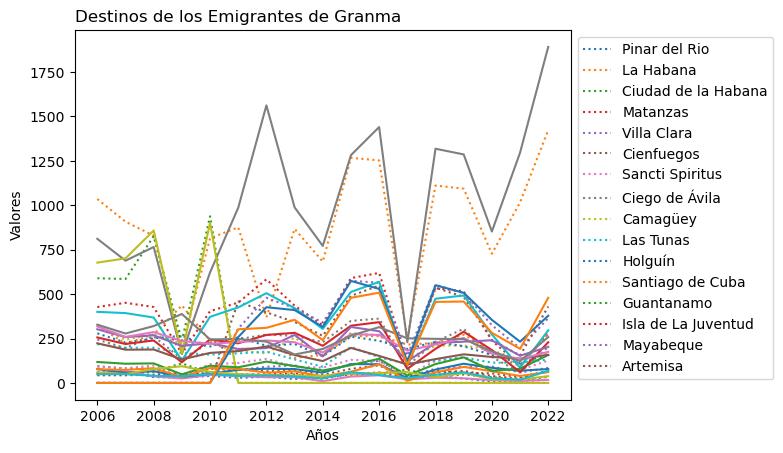

In [79]:
#función para calcular total de emigrantes por provinicas desde 2006-2022
def sumaEmigrantes_Provi(lista1)->list:
    a=[]
    suma=0
    for i in lista1:
        b=sum(i)
        a.append(b)
    return a

def sumarEmigrantes_Años(lista,año)->int:
    suma=0
    index=año-2006
    for i in lista:
        suma+=i[index]
    return suma
            
def sumar_listas(lista1,lista2)->list:
    suma=0
    a=[]
    for i in range(len(lista1)):
        suma=lista1[i]+lista2[i]
        a.append(suma)
    return a


# vuelvo a llamar a la función llenar_lista para llenar los datos de emigración de granma hacia cada provincia por hombres y mujeres 
provi=llenar_lista("ProvinciasMI","emigracion06-22",granma['Provincias'])

#separar datos de hombres que estan en los indices par
proviH=[y for x,y in enumerate(provi) if x%2==0 ]

#separar datos de mujeres que están en indice impar
proviM=[y for x,y in enumerate(provi)if x%2!=0]


#función para sumar todos los emigrantes hombres desde el 2006-2022 por cada provincia
sumaH=sumaEmigrantes_Provi(proviH)


#función para sumar todos los emigrantes mujeres desde el 2006-2022 por cada provincia
sumaM=sumaEmigrantes_Provi(proviM)


# devuelve una lista con el total de emigrantes del 2006,2007....2022 de los hombres
emigrantes_por_años_hombres_para_cada_provincia=[]
for i in range(2006,2023):
    sumar=sumarEmigrantes_Años(proviH,i)
    emigrantes_por_años_hombres_para_cada_provincia.append(sumar)
    

""""en este ciclo llamamos a la función sumarEmigrantes sucesivamente para obtener una nueva lista 
con la suma de cada emigrante mujer en cada año """
emigrantes_por_años_mujeres_para_cada_provincia=[]
for i in range(2006,2023):
    sumar=sumarEmigrantes_Años(proviM,i)
    emigrantes_por_años_mujeres_para_cada_provincia.append(sumar)


#suma total de hombres por cada año2006-2022
suma_total_Hombres_por_cada_año=[]
for i in range(2006,2023):
    sumar=sumarEmigrantes_Años(listaH,i)
    suma_total_Hombres_por_cada_año.append(sumar)


#suma total de mujeres por cada año-2006-2022
suma_total_Mujeres_por_cada_año_Munis=[]
for i in range(2006,2023):
    sumar=sumarEmigrantes_Años(listaM,i)
    suma_total_Mujeres_por_cada_año_Munis.append(sumar)


#creación del data frame de Hombres
dfH=pd.DataFrame(proviH,columns=[x for x in granma["años"]if x>=2006],index=granma['Provincias'])

#creación del data frame de mujeres
dfM=pd.DataFrame(proviM,columns=[x for x in granma["años"]if x>=2006],index=granma['Provincias'])

#transpuestas
dfH=dfH.transpose()
dfM=dfM.transpose()

#grafico de lineas de plotly de Hombres
fig=px.line(dfH,x=dfH.index,y=dfH.columns,template='seaborn')
#grafico de lineas de plotly de mujeres
fig1=px.line(dfM,template='seaborn')


fig.show()
fig1.show()


plt.plot(dfH,linestyle='dotted')
plt.plot(dfM)

#creamos una leyenda
plt.legend(dfH.columns, bbox_to_anchor=(1.00, 1), loc='upper left')


#le ponemos in titulo
plt.title("Destinos de los Emigrantes de Granma",loc="left")

#cambiamos el nombre del eje x
plt.xlabel("Años")

#cambiamos el nombre del eje y
plt.ylabel("Valores")

plt.show()


[7603, 6793, 7427, 3946, 6979, 6975, 7625, 7085, 5387, 9383, 9666, 3084, 8317, 8573, 5569, 4838, 8321]


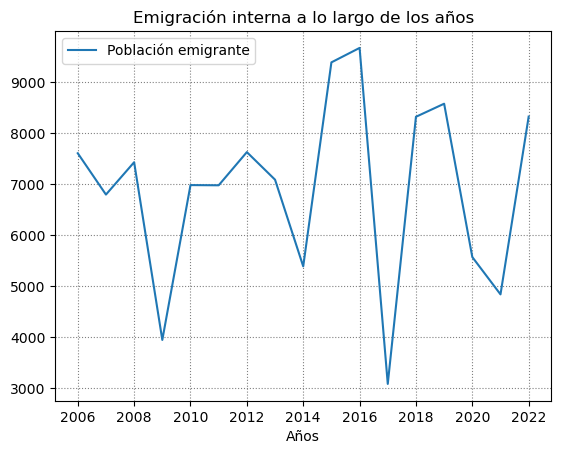

In [33]:
#función para sumar los valores de los hombres con las mujeres
suma_de_MH_por_provincias = sumar_listas(emigrantes_por_años_hombres_para_cada_provincia, emigrantes_por_años_mujeres_para_cada_provincia)


#lista de la suma de mujeres mas hombres en cada año de cada municipio
suma_de_munis_por_año=sumar_listas(suma_total_Hombres_por_cada_año,suma_total_Mujeres_por_cada_año_Munis)

print(suma_de_MH_por_provincias)
df3=pd.DataFrame(suma_de_MH_por_provincias,index=[x for x in granma['años']if x>=2006],columns=["Emigrantes"])

plt.plot(df3,label="Población emigrante")
plt.grid(axis='x',color='gray',linestyle='dotted')
plt.grid(axis='y',color='gray',linestyle='dotted')
plt.legend(loc='best')
plt.xlabel("Años")
plt.title("Emigración interna a lo largo de los años")
plt.show()


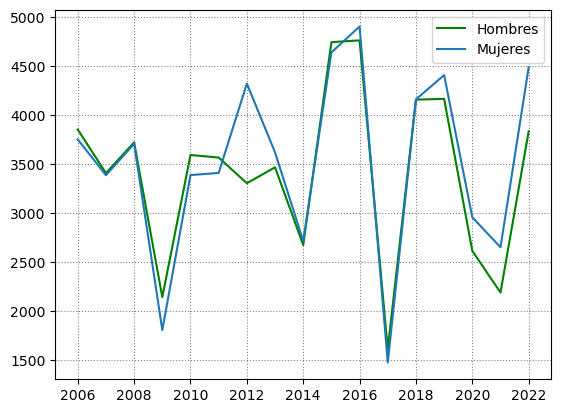

In [66]:
df4=pd.DataFrame(emigrantes_por_años_hombres_para_cada_provincia,index=[x for x in granma['años']if x>=2006])
df5=pd.DataFrame(emigrantes_por_años_mujeres_para_cada_provincia,index =[x for x in granma['años']if x>=2006])
plt.plot(df4,label="Hombres",color="green")
plt.plot(df5,label="Mujeres")
plt.legend(loc="best")
plt.grid(axis='x',color='gray',linestyle='dotted')
plt.grid(axis='y',color='gray',linestyle='dotted')
plt.show()